## Prediction of the profitable days

The project is dedicated to predicting profitable days based on historical signals. It uses clustering methods (K-Means, PCA) and classification methods (Random Forest, Dummy Classifier). The results showed low prediction quality, but PCA improved the clustering quality and revealed partial dependencies.

### Reading start file

In [1]:
import pandas as pd
df = pd.read_parquet(r'C:\Users\Ксюша\Downloads\all_signals-28-6-2025.parquet')
df

,spike_efficiency__ystd_1min_signal,significant_spike_count__ystd_1min_signal,spike_intensity__ystd_1min_signal,daily_cumulative_return__today_1min_signal,trend_consistency__today_1min_signal,daily_volatility__ystd_1min_signal,volatility_10min_intervals__ystd_1min_signal,volatility_1hour_intervals__ystd_1min_signal,total_price_movement__ystd_1min_signal,max_price_spike__ystd_1min_signal,...,market_stress__today_1min_signal,trend_strength__today_1min_signal,volatility_persistence__today_1min_signal,movement_consistency__today_1min_signal,spike_efficiency__today_1min_signal,volatility_stability__today_1min_signal,daily_volatility_ystd_vs_today_signal,total_price_movement_ystd_vs_today_signal,max_price_spike_ystd_vs_today_signal,significant_spike_count_ystd_vs_today_signal
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-17,1,1,1,1,1,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2024-10-18,1,1,1,1,1,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,1
2024-10-22,1,1,1,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


### Training K-Means and drawing graph to define the optimal number of clusters

In [2]:
from sklearn.cluster import KMeans

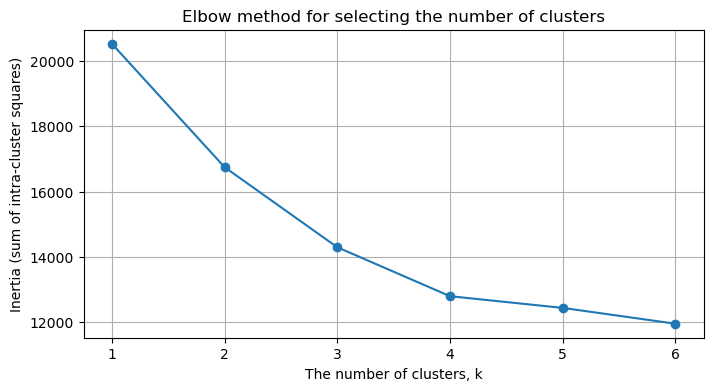

In [3]:
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow method for selecting the number of clusters")
plt.xlabel("The number of clusters, k")
plt.ylabel("Inertia (sum of intra-cluster squares)")
plt.grid(True)
plt.show()

In [4]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(df)
df['cluster'].value_counts()

D:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
2    292
3    248
1    200
0    189
Name: count, dtype: int64

The optimal number of clusters is 4 according to the graph.

### Analyze the quality of model

In [5]:
from sklearn.metrics import silhouette_score

In [6]:
labels = df['cluster']
from sklearn.metrics import silhouette_score
score = silhouette_score(df, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.3163085033683638


###  Reading new file 'target', renaming column, setting format

In [7]:
target = pd.read_csv(r'C:\Users\Ксюша\OneDrive\Рабочий стол\Альфа алгоритмы\clean_target.csv')

In [8]:
target = target.rename(columns={'Unnamed: 0': 'Date'})
target

,Date,Target
0,2021-01-04,1.0
1,2021-01-05,-1.0
2,2021-01-06,1.0
3,2021-01-07,1.0
4,2021-01-08,1.0
...,...,...
1039,2025-04-17,-1.0
1040,2025-04-21,1.0
1041,2025-04-22,1.0
1042,2025-04-23,1.0


In [9]:
target['Date'] = pd.to_datetime(target['Date'])

### Merging datasets in order to correlate cluster with the date from dataset 'target'

In [10]:
df_merged = target.merge(df, on='Date', how='left')
df_merged

,Date,Target,spike_efficiency__ystd_1min_signal,significant_spike_count__ystd_1min_signal,spike_intensity__ystd_1min_signal,daily_cumulative_return__today_1min_signal,trend_consistency__today_1min_signal,daily_volatility__ystd_1min_signal,volatility_10min_intervals__ystd_1min_signal,volatility_1hour_intervals__ystd_1min_signal,...,trend_strength__today_1min_signal,volatility_persistence__today_1min_signal,movement_consistency__today_1min_signal,spike_efficiency__today_1min_signal,volatility_stability__today_1min_signal,daily_volatility_ystd_vs_today_signal,total_price_movement_ystd_vs_today_signal,max_price_spike_ystd_vs_today_signal,significant_spike_count_ystd_vs_today_signal,cluster
0,2021-01-04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-05,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0
2,2021-01-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,2021-01-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
4,2021-01-08,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,2025-04-17,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,2025-04-21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,2025-04-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,2025-04-23,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Choosing 3 essential columns

In [11]:
df_need = df_merged[['Date', 'Target', 'cluster']]
df_need

,Date,Target,cluster
0,2021-01-04,1.0,NaN
1,2021-01-05,-1.0,3.0
2,2021-01-06,1.0,3.0
3,2021-01-07,1.0,3.0
4,2021-01-08,1.0,2.0
...,...,...,...
1039,2025-04-17,-1.0,NaN
1040,2025-04-21,1.0,NaN
1041,2025-04-22,1.0,NaN
1042,2025-04-23,1.0,NaN


### Defining missing values and dropping them

In [12]:
df_need['cluster'].isna().sum()

450

In [13]:
df_clean = df_need.dropna()
df_clean

,Date,Target,cluster
1,2021-01-05,-1.0,3.0
2,2021-01-06,1.0,3.0
3,2021-01-07,1.0,3.0
4,2021-01-08,1.0,2.0
6,2021-01-12,-1.0,3.0
...,...,...,...
917,2024-10-17,-1.0,2.0
918,2024-10-18,1.0,3.0
920,2024-10-22,-1.0,2.0
921,2024-10-23,1.0,2.0


### Analyze the distribution of clusters

In [14]:
df_clean['cluster'].value_counts() # No cluster 1 :(

cluster
2.0    279
3.0    196
0.0    119
Name: count, dtype: int64

### Checking if dates of cluster 1 exist in dataset 'target'

In [15]:
cluster_one = df[df['cluster'] == 1]
cluster_one

,spike_efficiency__ystd_1min_signal,significant_spike_count__ystd_1min_signal,spike_intensity__ystd_1min_signal,daily_cumulative_return__today_1min_signal,trend_consistency__today_1min_signal,daily_volatility__ystd_1min_signal,volatility_10min_intervals__ystd_1min_signal,volatility_1hour_intervals__ystd_1min_signal,total_price_movement__ystd_1min_signal,max_price_spike__ystd_1min_signal,...,trend_strength__today_1min_signal,volatility_persistence__today_1min_signal,movement_consistency__today_1min_signal,spike_efficiency__today_1min_signal,volatility_stability__today_1min_signal,daily_volatility_ystd_vs_today_signal,total_price_movement_ystd_vs_today_signal,max_price_spike_ystd_vs_today_signal,significant_spike_count_ystd_vs_today_signal,cluster
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-03-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-03-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df_need[df_need['Date'] == '2020-03-27']

,Date,Target,cluster


In [17]:
df_need[df_need['Date'] == '2019-01-10']

,Date,Target,cluster


### Make sure each column of cluster 1 has zeros

In [18]:
df_sum = cluster_one.sum()
nonzero_columns = df_sum[df_sum != 0]
nonzero_columns

cluster    200
dtype: int64

As we can see each column has zeros, so these dates got into cluster 1 due to this feature. 

In dataset 'target' dates of cluster 1 are not included.

### Collecting statistics and providing additional data

In [19]:
group_clust = df_clean.groupby('cluster')['Target'].mean()
group_clust

cluster
0.0   -0.075630
2.0   -0.132616
3.0   -0.214286
Name: Target, dtype: float64

In [20]:
pd.crosstab(df_clean['cluster'], df_clean['Target'], normalize='index') * 100

Target,-1.0,1.0
cluster,,
0.0,53.781513,46.218487
2.0,56.630824,43.369176
3.0,60.714286,39.285714


* Cluster 0 shows the best result among all (mean = –0.0756), which means that trades are more likely to be successful or close to equilibrium.

* Cluster 2 is worse, with a mean of –0.1326, which indicates a higher proportion of unsuccessful trades.

* Cluster 3 is the most loss-making, with a mean of –0.2143. This cluster is clearly dominated by unsuccessful signals, and it may be advisable to avoid trading during periods associated with this cluster.

In [21]:
df_clean['day_of_week'] = df_clean['Date'].dt.day_name()
df_clean['month'] = df_clean['Date'].dt.month
df_clean['year'] = df_clean['Date'].dt.year
df_clean['quarter'] = df_clean['Date'].dt.quarter

C:\Users\Ксюша\AppData\Local\Temp\ipykernel_12436\2845953881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day_of_week'] = df_clean['Date'].dt.day_name()
C:\Users\Ксюша\AppData\Local\Temp\ipykernel_12436\2845953881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean['Date'].dt.month
C:\Users\Ксюша\AppData\Local\Temp\ipykernel_12436\2845953881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [22]:
df_clean

,Date,Target,cluster,day_of_week,month,year,quarter
1,2021-01-05,-1.0,3.0,Tuesday,1,2021,1
2,2021-01-06,1.0,3.0,Wednesday,1,2021,1
3,2021-01-07,1.0,3.0,Thursday,1,2021,1
4,2021-01-08,1.0,2.0,Friday,1,2021,1
6,2021-01-12,-1.0,3.0,Tuesday,1,2021,1
...,...,...,...,...,...,...,...
917,2024-10-17,-1.0,2.0,Thursday,10,2024,4
918,2024-10-18,1.0,3.0,Friday,10,2024,4
920,2024-10-22,-1.0,2.0,Tuesday,10,2024,4
921,2024-10-23,1.0,2.0,Wednesday,10,2024,4


### Watching some results and finding out patterns

#### Day of the week

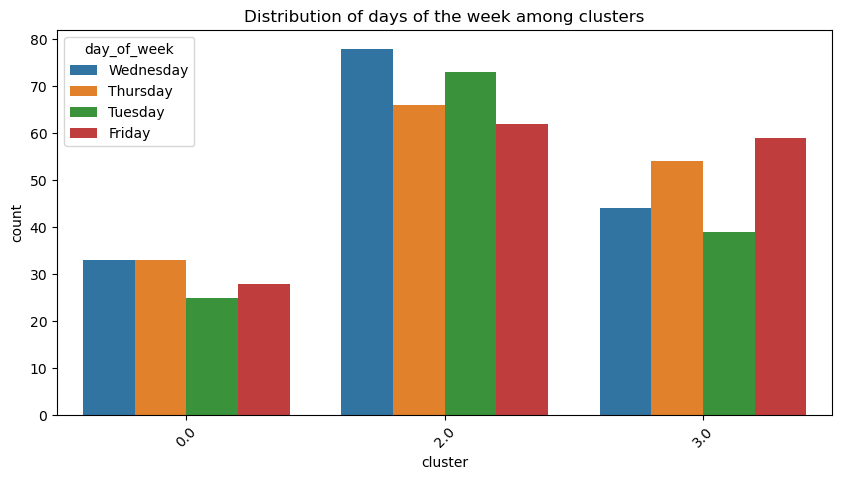

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='cluster', hue='day_of_week')
plt.title('Distribution of days of the week among clusters')
plt.xticks(rotation=45)
plt.show()

In [24]:
pd.crosstab(df_clean['cluster'], df_clean['day_of_week'], normalize='index') * 100

day_of_week,Friday,Thursday,Tuesday,Wednesday
cluster,,,,
0.0,23.529412,27.731092,21.008403,27.731092
2.0,22.222222,23.655914,26.164875,27.956989
3.0,30.102041,27.551020,19.897959,22.448980


The days of week are distributed evenly

#### Month

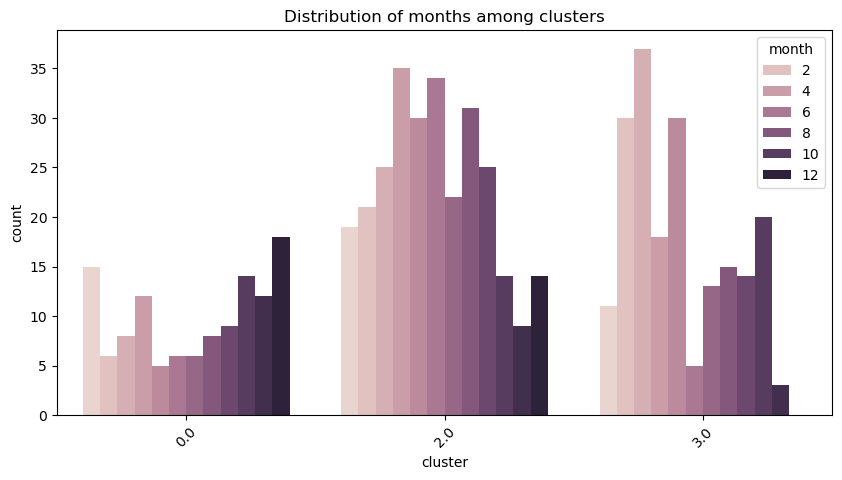

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='cluster', hue='month')
plt.title('Distribution of months among clusters')
plt.xticks(rotation=45)
plt.show()

In [26]:
pd.crosstab(df_clean['cluster'], df_clean['month'], normalize='index') * 100

month,1,2,3,4,5,6,7,8,9,10,11,12
cluster,,,,,,,,,,,,
0.0,12.605042,5.042017,6.722689,10.084034,4.201681,5.042017,5.042017,6.722689,7.563025,11.764706,10.084034,15.126050
2.0,6.810036,7.526882,8.960573,12.544803,10.752688,12.186380,7.885305,11.111111,8.960573,5.017921,3.225806,5.017921
3.0,5.612245,15.306122,18.877551,9.183673,15.306122,2.551020,6.632653,7.653061,7.142857,10.204082,1.530612,0.000000


Ranges of clusters:
* 0 - 11 points (15 - 4)
* 2 - 9 points (12 - 9) 
* 3 - 18 points (18 - 0)

As we can notice there are no December in cluster 3, also March takes the large share

* Cluster 3 is "spring-like", with a pronounced decline in November and December.
* Cluster 2 is "spring-summer", with less in autumn.
* Cluster 0 is the most uniform, but with a mild winter and autumn bias.

#### Year

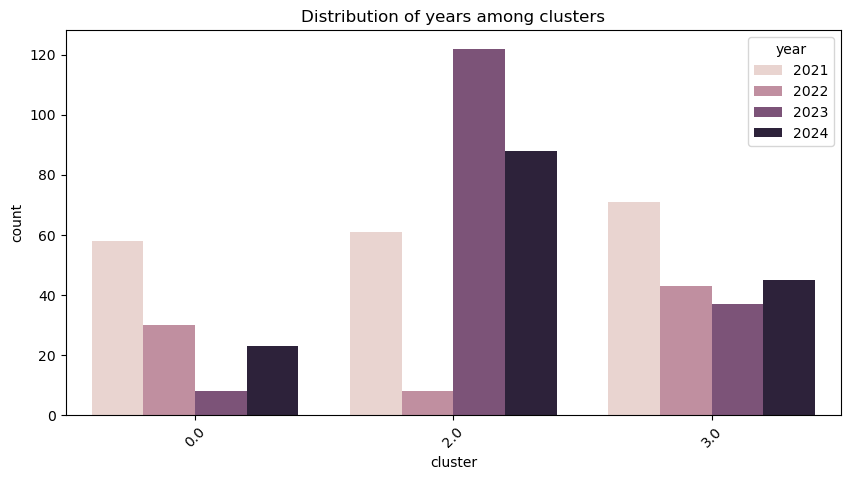

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='cluster', hue='year')
plt.title('Distribution of years among clusters')
plt.xticks(rotation=45)
plt.show()

In [28]:
pd.crosstab(df_clean['cluster'], df_clean['year'], normalize='index') * 100

year,2021,2022,2023,2024
cluster,,,,
0.0,48.739496,25.210084,6.722689,19.327731
2.0,21.863799,2.867384,43.727599,31.541219
3.0,36.224490,21.938776,18.877551,22.959184


* Cluster 0 is old (2021), almost disappears by 2023.
* Cluster 2 is new (2023–2024), as if it appeared in 2023.
* Cluster 3 is stable, there are no sharp distortions, covers all years almost evenly

#### Quarters

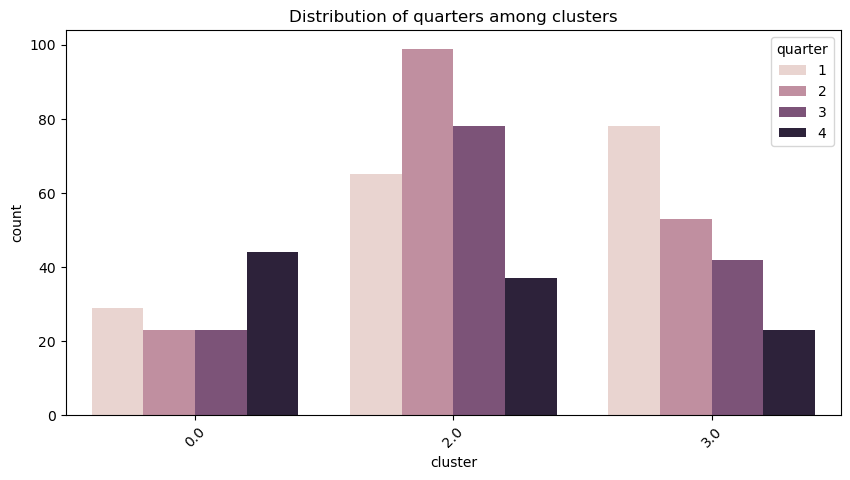

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='cluster', hue='quarter')
plt.title('Distribution of quarters among clusters')
plt.xticks(rotation=45)
plt.show()

In [30]:
pd.crosstab(df_clean['cluster'], df_clean['quarter'], normalize='index') * 100

quarter,1,2,3,4
cluster,,,,
0.0,24.369748,19.327731,19.327731,36.974790
2.0,23.297491,35.483871,27.956989,13.261649
3.0,39.795918,27.040816,21.428571,11.734694


* Cluster 0 is predominantly formed in the fourth quarter (October–December), which accounts for almost 37% of all its dates. This may indicate typical patterns of behavior or activity that are characteristic of the end of the year. In the remaining quarters, this cluster is more evenly distributed, with no pronounced peaks.
  
* Cluster 2 is particularly prominent in the second quarter (April–June), accounting for about 35% of all its observations. It also has a significant presence in the third quarter (summer). In the fourth quarter, it is noticeably weaker, at less than 14%, which may indicate a decrease in activity or a change in trend during this time of year.
  
* Cluster 3 is clearly tied to the first quarter (January-March), which accounts for almost 40% of all dates. Its share gradually decreases as we move through the annual quarters, reaching a minimum in the fourth quarter, making this cluster characteristic of the beginning of the year.

### Conclusions

As we remember, when counted the mean defenitions, cluster 0 showed the most favorable result. Our observations regarding this cluster:
* Cluster 0: Mostly contains 4 quarter and years except 2023
* Cluster 2: Consists of 2 and 3 quarters and shows 2023-2024 years
* Cluster 3: Is about 1 quarter and also 2021 year  

According to this info we can assume, that the most successful period for trading is 4 quarter (October, November, December) and the beginning of the year 

### Using PCA and then KMeans

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df)

In [33]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [34]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)
df_pca['cluster'].value_counts()

D:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
3    292
2    248
0    200
1    189
Name: count, dtype: int64

In [35]:
labels_2 = df_pca['cluster']
score_2 = silhouette_score(df_pca, labels_2)
print("Silhouette Score:", score_2)

Silhouette Score: 0.44854793640178725


The quality estimating shows better result than a previous model.

In [36]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
0,-3.703461,1.482585,-0.721932,-0.020152,-0.214303,0.027965,0.004418,-0.029158,0.114931,-0.016571,0
1,-3.703461,1.482585,-0.721932,-0.020152,-0.214303,0.027965,0.004418,-0.029158,0.114931,-0.016571,0
2,-3.703461,1.482585,-0.721932,-0.020152,-0.214303,0.027965,0.004418,-0.029158,0.114931,-0.016571,0
3,-3.703461,1.482585,-0.721932,-0.020152,-0.214303,0.027965,0.004418,-0.029158,0.114931,-0.016571,0
4,-3.703461,1.482585,-0.721932,-0.020152,-0.214303,0.027965,0.004418,-0.029158,0.114931,-0.016571,0
...,...,...,...,...,...,...,...,...,...,...,...
924,1.119723,-0.321958,1.790384,-1.632255,1.294335,2.116773,-0.438834,0.819293,0.788109,-0.835454,3
925,1.068156,-0.719864,-0.852387,-0.187012,2.838870,0.917001,1.337585,-0.468475,1.290142,0.515729,2
926,-0.267655,-1.132160,2.355260,1.616921,1.269233,-0.325166,-0.815308,-1.964092,0.292011,-0.574194,3
927,0.085870,-0.417321,3.244056,-0.987149,-0.449503,0.545745,-0.182721,1.113608,-0.538898,0.022652,3


In [37]:
df_onlydates = df.copy()
df_onlydates['Date'] = df_onlydates.index
df_onlydates = df_onlydates.reset_index(drop=True)
df_onlydates = df_onlydates[['Date']]
df_onlydates

,Date
0,2019-01-04
1,2019-01-08
2,2019-01-09
3,2019-01-10
4,2019-01-11
...,...
924,2024-10-17
925,2024-10-18
926,2024-10-22
927,2024-10-23


In [38]:
df_onlydates['month'] = pd.to_datetime(df_onlydates['Date']).dt.month
df_onlydates['dayofweek'] = pd.to_datetime(df_onlydates['Date']).dt.dayofweek
df_onlydates['day'] = pd.to_datetime(df_onlydates['Date']).dt.day
df_onlydates['is_month_start'] = pd.to_datetime(df_onlydates['Date']).dt.is_month_start.astype(int)
df_onlydates['is_month_end'] = pd.to_datetime(df_onlydates['Date']).dt.is_month_end.astype(int)
df_onlydates

,Date,month,dayofweek,day,is_month_start,is_month_end
0,2019-01-04,1,4,4,0,0
1,2019-01-08,1,1,8,0,0
2,2019-01-09,1,2,9,0,0
3,2019-01-10,1,3,10,0,0
4,2019-01-11,1,4,11,0,0
...,...,...,...,...,...,...
924,2024-10-17,10,3,17,0,0
925,2024-10-18,10,4,18,0,0
926,2024-10-22,10,1,22,0,0
927,2024-10-23,10,2,23,0,0


In [65]:
df_model = pd.concat([df_onlydates, df_pca], axis=1)
df_model = df_model.merge(target, on='Date')
df_model

,Date,month,dayofweek,day,is_month_start,is_month_end,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster,Target
0,2021-01-05,1,1,5,0,0,0.553132,-2.261230,-1.860704,2.043882,-0.805229,-0.774568,-0.287216,0.127198,0.242016,-1.218850,2,-1.0
1,2021-01-06,1,2,6,0,0,2.278857,-1.350279,-1.130057,-1.920775,-0.142002,0.511557,0.727841,-2.313357,-0.194102,-0.090047,2,1.0
2,2021-01-07,1,3,7,0,0,1.189502,-1.669324,-1.149914,-1.514042,-1.436384,-0.748352,1.069962,0.786181,0.961754,-1.170952,2,1.0
3,2021-01-08,1,4,8,0,0,-0.187883,-1.385066,0.880299,-1.414866,-1.156955,1.607234,0.025513,0.273381,-0.733369,2.198388,3,1.0
4,2021-01-12,1,1,12,0,0,0.484176,-1.874418,-1.060830,-2.229310,-0.686521,-0.045710,1.590644,0.437277,0.579840,-0.594211,2,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,2024-10-17,10,3,17,0,0,1.119723,-0.321958,1.790384,-1.632255,1.294335,2.116773,-0.438834,0.819293,0.788109,-0.835454,3,-1.0
590,2024-10-18,10,4,18,0,0,1.068156,-0.719864,-0.852387,-0.187012,2.838870,0.917001,1.337585,-0.468475,1.290142,0.515729,2,1.0
591,2024-10-22,10,1,22,0,0,-0.267655,-1.132160,2.355260,1.616921,1.269233,-0.325166,-0.815308,-1.964092,0.292011,-0.574194,3,-1.0
592,2024-10-23,10,2,23,0,0,0.085870,-0.417321,3.244056,-0.987149,-0.449503,0.545745,-0.182721,1.113608,-0.538898,0.022652,3,1.0


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [41]:
X = df_model.drop(columns=['Date', 'Target'])
y = df_model['Target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.57      0.81      0.67        68
         1.0       0.43      0.20      0.27        51

    accuracy                           0.55       119
   macro avg       0.50      0.50      0.47       119
weighted avg       0.51      0.55      0.50       119



In [45]:
df_model.groupby('cluster')['Target'].value_counts(normalize=True)

cluster  Target
1        -1.0      0.537815
          1.0      0.462185
2        -1.0      0.607143
          1.0      0.392857
3        -1.0      0.566308
          1.0      0.433692
Name: proportion, dtype: float64

The model does not recognize profitable days well and generally shows poor quality. K-Means together with PCA shows better quality then without, however separates clusters rather evenly, not allowing to find the useful patterns for prediction.

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

y_dummy_pred = dummy.predict(X_test)
print("Dummy Classifier:")
print(classification_report(y_test, y_dummy_pred))

Dummy Classifier:
              precision    recall  f1-score   support

        -1.0       0.57      1.00      0.73        68
         1.0       0.00      0.00      0.00        51

    accuracy                           0.57       119
   macro avg       0.29      0.50      0.36       119
weighted avg       0.33      0.57      0.42       119



D:\Anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
weights = df_model['Target'].replace({-1: 1, 1: 3})

In [67]:
kmeans_weights = KMeans(n_clusters=k, random_state=42, )
df_model = df_model.drop(columns=['Date', 'cluster'])
df_model

,month,dayofweek,day,is_month_start,is_month_end,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Target
0,1,1,5,0,0,0.553132,-2.261230,-1.860704,2.043882,-0.805229,-0.774568,-0.287216,0.127198,0.242016,-1.218850,-1.0
1,1,2,6,0,0,2.278857,-1.350279,-1.130057,-1.920775,-0.142002,0.511557,0.727841,-2.313357,-0.194102,-0.090047,1.0
2,1,3,7,0,0,1.189502,-1.669324,-1.149914,-1.514042,-1.436384,-0.748352,1.069962,0.786181,0.961754,-1.170952,1.0
3,1,4,8,0,0,-0.187883,-1.385066,0.880299,-1.414866,-1.156955,1.607234,0.025513,0.273381,-0.733369,2.198388,1.0
4,1,1,12,0,0,0.484176,-1.874418,-1.060830,-2.229310,-0.686521,-0.045710,1.590644,0.437277,0.579840,-0.594211,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,10,3,17,0,0,1.119723,-0.321958,1.790384,-1.632255,1.294335,2.116773,-0.438834,0.819293,0.788109,-0.835454,-1.0
590,10,4,18,0,0,1.068156,-0.719864,-0.852387,-0.187012,2.838870,0.917001,1.337585,-0.468475,1.290142,0.515729,1.0
591,10,1,22,0,0,-0.267655,-1.132160,2.355260,1.616921,1.269233,-0.325166,-0.815308,-1.964092,0.292011,-0.574194,-1.0
592,10,2,23,0,0,0.085870,-0.417321,3.244056,-0.987149,-0.449503,0.545745,-0.182721,1.113608,-0.538898,0.022652,1.0


In [68]:
df_model['cluster'] = kmeans_weights.fit_predict(df_model, sample_weight=weights)
df_model['cluster'].value_counts()

D:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


cluster
1    160
0    155
2    150
3    129
Name: count, dtype: int64

In [69]:
labels_3 = df_model['cluster']
score_3 = silhouette_score(df_model, labels_3)
print("Silhouette Score:", score_3)

Silhouette Score: 0.23809104966049177
